In [4]:
import matplotlib.pyplot as plt
import numpy as np
import time
import random

### Вспомогательные функции

In [357]:
def plot_difference(x, j1, j2, j3, minv1, minv2, minv3, fname = "fname"):
    plt.figure(figsize = (14,4))
    plt.subplot(1,3,1)
    plt.scatter(x[j1], minv1, color = 'r')
    plt.plot(x, y, linewidth = 2)
    plt.annotate('min (%.1f, %.3f)'%(x[j1], minv1), xy=(x[j1]+0.01, minv1+0.01), xytext=(x[j1]+0.1, minv1+0.1),
                arrowprops=dict(facecolor='orange', shrink=1, linewidth = 0.0002))
    plt.ylabel(fname, size = 12)
    plt.xlabel("x", size = 12)
    plt.title("Exhaustive search", size = 16)
    plt.grid()

    plt.subplot(1,3,2)
    plt.scatter(j2, minv2, color = 'r')
    plt.plot(x, y, linewidth = 2)
    plt.annotate('min (%.1f, %.3f)'%(j2, minv2), xy=(j2+0.01, minv2+0.01), xytext=(j2+0.1, minv2+0.1),
                arrowprops=dict(facecolor='orange', shrink=1, linewidth = 0.0002))
    plt.ylabel(fname, size = 12)
    plt.xlabel("x", size = 12)
    plt.title("Dihotomy search", size = 16)
    plt.grid()

    plt.subplot(1,3,3)
    plt.scatter(j3, minv3, color = 'r')
    plt.plot(x, y, linewidth = 2)
    plt.annotate('min (%.1f, %.3f)'%(j3, minv3), xy=(j3+0.01, minv3+0.01), xytext=(j3+0.1, minv3+0.1),
                arrowprops=dict(facecolor='orange', shrink=1, linewidth = 0.0002))
    plt.ylabel(fname, size = 12)
    plt.xlabel("x", size = 12)
    plt.title("Golden search", size = 16)
    plt.grid()

    plt.tight_layout()

### Функции

In [358]:
def x3(x):
    return x**3 

def apsx2(x):
    return abs(x - 0.2)

def xsin(x):
    return x*np.sin(1/x)

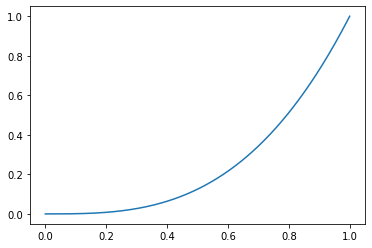

In [359]:
x = np.linspace(0,1,1000)
y = np.asarray(list(map(x3, x)))

plt.plot(x,y)

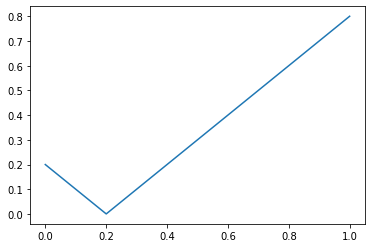

In [360]:
x = np.linspace(0,1,1000)
y = np.asarray(list(map(apsx2, x)))

plt.plot(x,y)

C:\Users\mi\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in double_scalars
  
C:\Users\mi\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in sin
  


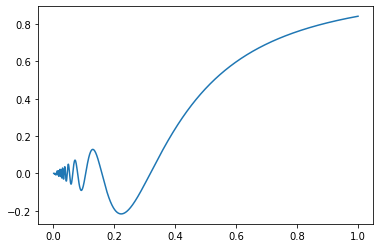

In [361]:
x = np.linspace(0,1,1000)
y = np.asarray(list(map(xsin, x)))

plt.plot(x,y)

### Алгоритмы поиска минимума.

#### Перебор 

In [362]:
def exhaustive_search(x,f):
    minv = 10000
    count_of_iterations = 0
    count_of_funct = 0
    j = -1
    for i in range(len(x)):
        count_of_iterations+=1
        count_of_funct+=1
        if f(x[i]) < minv:            
            minv = f(x[i])
            j = i
    return minv, j, count_of_iterations, count_of_funct 

#### Бинарный поиск

In [363]:
# def dihotomy_search(x, f, count_of_iterations=0, count_of_funct=1):  
#     count_of_iterations+=1
#     count_of_funct+=2
#     v1 = f(x[len(x)//2])
#     v2 = f(x[len(x)//2 + 1])
#     if v1 > v2:
#         xnext = x[len(x)//2:]
#     else:
#         xnext = x[:len(x)//2 + 1]
#     if len(x)<5:
#         return f(x[len(x)//2]),count_of_iterations,count_of_funct
#     return  dihotomy_search(xnext, f,count_of_iterations,count_of_funct)

def dihotomy_search(f, a, b, count_of_iterations=0, count_of_funct=1):
    iterations = 0
    eps = 0.01
    delta = 0.001
    count_of_iterations = 0
    while abs(a - b) > eps:
        a_next = (a + b - delta) / 2
        b_next = (a + b + delta) / 2
        if f(a_next) < f(b_next):
            b = b_next
        else:
            a = a_next
        iterations += 2
        count_of_iterations+=1
    return f(a), count_of_iterations, iterations

dichotomy(xsin, 0, 10)

(-0.21686949461293112, 22)

#### Золотое сечение


In [365]:
phi = (1 + (5)**0.5)/2
resphi = 2 - phi

def golden_search(f, a, c, b, per = 0.00001, count_of_iterations=0, count_of_funct=1):
    count_of_iterations+=1
    count_of_funct+=2
    if abs(a - b) < per:
        return (a + b)/2, per,count_of_iterations,count_of_funct
    # Create a new possible center, in the area between c and b, pushed against c
    d = c + resphi*(b - c)
    if f(d) < f(c):
        return golden_search(f, c, d, b, per,count_of_iterations,count_of_funct)
    else:
        return golden_search(f, d, c, a, per,count_of_iterations,count_of_funct)
    
print("%.4f"%golden_search(xsin, 0, (0 + resphi*2), 1, 1e-10)[0])

0.2225


### Сравнение алгоритмов 

100000 100000
7 14
51 103


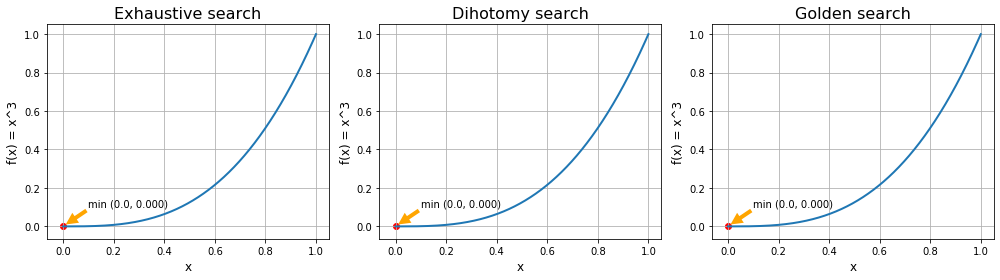

In [366]:
x = np.linspace(0,1,100000)
y = np.asarray(list(map(x3, x)))

minv1, j1, iters1, fiters1 = exhaustive_search(x, x3)

minv2, iters2, fiters2  = dihotomy_search(x3, 0, (0 + resphi*2) )
j2 = list(y).index(minv2)

minv3, _, iters3, fiters3  = golden_search(x3, 0, (0 + resphi*2), 1, 1e-10)
j3 = x3(minv3)

plot_difference(x, j1, j2, j3, minv1, minv2, minv3, fname = 'f(x) = x^3')

print(iters1, fiters1)
print(iters2, fiters2)
print(iters3, fiters3)

0.19669341205083546
100000 100000
7 14
32 65


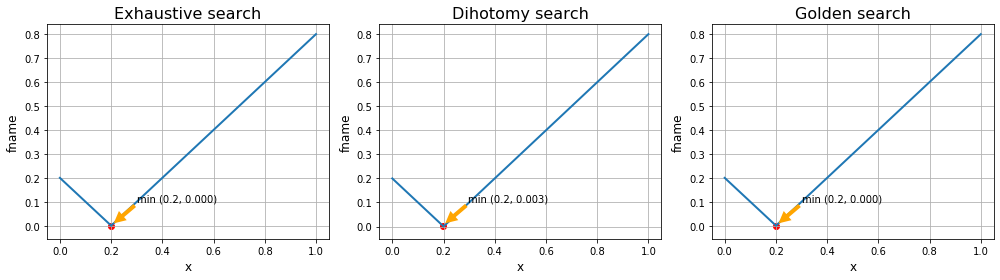

In [367]:
x = np.linspace(0,1,100000)
y = np.asarray(list(map(apsx2, x)))

minv1, j1,iters1, fiters1 = exhaustive_search(x, apsx2)

minv2,iters2, fiters2 = dihotomy_search(apsx2, 0, (0 + resphi*2) )
j2 = apsx2(minv2)
print(j2)

j3,_,iters3, fiters3 = golden_search(apsx2, 0, (0 + resphi*2), 1, 0.000001)
minv3 = apsx2(j3)

#j3 = list(y).index(minv3)

plot_difference(x, j1, j2, j3, minv1, minv2, minv3)

print(iters1, fiters1)
print(iters2, fiters2)
print(iters3, fiters3)

C:\Users\mi\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in double_scalars
  
C:\Users\mi\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in sin
  


1000 1000
7 14
22 45


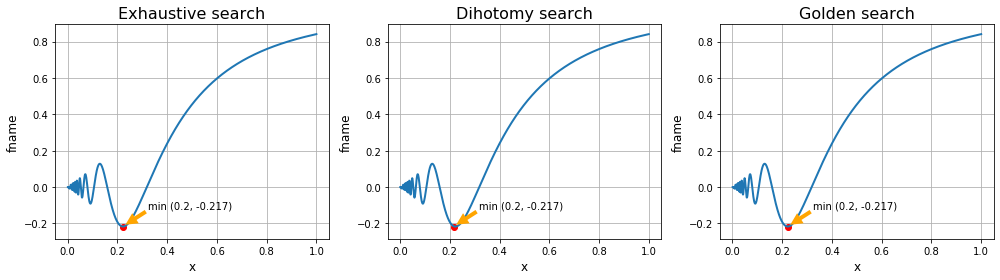

In [369]:
x = np.linspace(0,1,1000)
y = np.asarray(list(map(xsin, x)))

minv1, j1, iters1, fiters1 = exhaustive_search(x, xsin)

minv2,iters2, fiters2 = dihotomy_search(xsin, 0, (0 + resphi*2) )
j2 = abs(xsin(minv2))

j3,_,iters3, fiters3 = golden_search(xsin, 0, (0 + resphi*2), 1, 0.0001)
minv3 = xsin(j3)

#j3 = list(y).index(minv3)
plot_difference(x, j1, j2, j3, minv1, minv2, minv3)

print(iters1, fiters1)
print(iters2, fiters2)
print(iters3, fiters3)

### Minimization problem

In [126]:
from scipy.optimize import least_squares, brute,minimize


In [236]:
def linear(x, a, b):
    return x*a + b

def rational(x, a, b):
    return a/(1 + b*x)

def MSE(params):
    global x
    global y
    global f
    result = 0
    for k in range(0, len(x)):
        result+=(f(x[k], params[0], params[1]) - y[k])**2
    return result

In [281]:
def plot_approx(params, f, name, label = 'k*x + b', color = 'r'):
    x_ = np.linspace(0,10,len(x))
    a, b = params
    y_ = list(map(lambda X:f(X, a, b), x_))
    
    plt.scatter(x,y, color = 'c')
    plt.plot(x_, y_, color = color, label = label)
    plt.title (name)
    plt.legend()

In [233]:
a = np.random.random()
b = np.random.random()

In [234]:
x = []
y = []

for i in range(1,1000):
    xk = i/100
    q = np.random.normal(0, 1)
    yk = a*xk + b + q
    
    x.append(xk)
    y.append(yk)

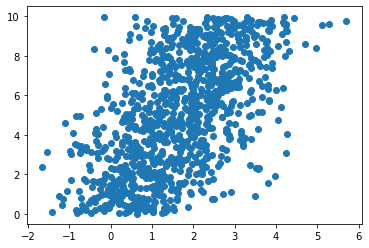

In [235]:
plt.scatter(y,x)

### Линейная апроксимация

In [237]:
options = {'xatol': 1e-3, 'disp': True}
x0 = np.array([0, 0])
f = linear
res_linear_nm = minimize(MSE, x0, method='Nelder-Mead',
               options=options)
print(res_linear_nm)


Optimization terminated successfully.
         Current function value: 982.751569
         Iterations: 69
         Function evaluations: 135
 final_simplex: (array([[0.23585991, 0.45134632],
       [0.23595065, 0.45074941],
       [0.23590153, 0.45090035]]), array([982.75156906, 982.75159451, 982.75161522]))
           fun: 982.7515690629825
       message: 'Optimization terminated successfully.'
          nfev: 135
           nit: 69
        status: 0
       success: True
             x: array([0.23585991, 0.45134632])


In [238]:
rranges = (slice(-4, 10, 0.25), slice(-4, 10, 0.25))
res_linear_brute = brute(MSE, rranges, disp = True)
print( res_linear_brute)


Optimization terminated successfully.
         Current function value: 982.751554
         Iterations: 25
         Function evaluations: 51
[0.23590303 0.45110776]


In [239]:
x0 = np.array([0,0])
res_linear_powell = minimize(MSE, x0, method='powell',
               options=options)
print(res_linear_powell.x)


C:\Users\mi\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: OptimizeWarning: Unknown solver options: xatol
  This is separate from the ipykernel package so we can avoid doing imports until


Optimization terminated successfully.
         Current function value: 982.751552
         Iterations: 3
         Function evaluations: 111
[0.23590439 0.45113658]


### Рациональная апроксимация

In [274]:
options = {'xatol': 1e-3, 'disp': True}
x0 = np.array([0, 0])
f = rational
res_rational_nm = minimize(MSE, x0, method='Nelder-Mead',
               options=options)
print(res_rational_nm.x)

Optimization terminated successfully.
         Current function value: 1037.380875
         Iterations: 78
         Function evaluations: 146
[ 0.96557376 -0.06963003]


In [290]:
rranges = (slice(0, 10, 0.10), slice(0, 10, 0.10))
f = rational
res_rational_brute = brute(MSE, rranges, disp = True)
print( res_rational_brute)


Optimization terminated successfully.
         Current function value: 1037.380835
         Iterations: 43
         Function evaluations: 83
[ 0.9653225  -0.06964123]


In [276]:
x0 = np.array([0,0])
f = rational
res_rational_powell = minimize(MSE, x0, method='powell',
               options=options)
print(res_rational_powell.x)

C:\Users\mi\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: OptimizeWarning: Unknown solver options: xatol
  after removing the cwd from sys.path.


Optimization terminated successfully.
         Current function value: 1037.380832
         Iterations: 5
         Function evaluations: 162
[ 0.96536006 -0.06964078]


### Cравнение

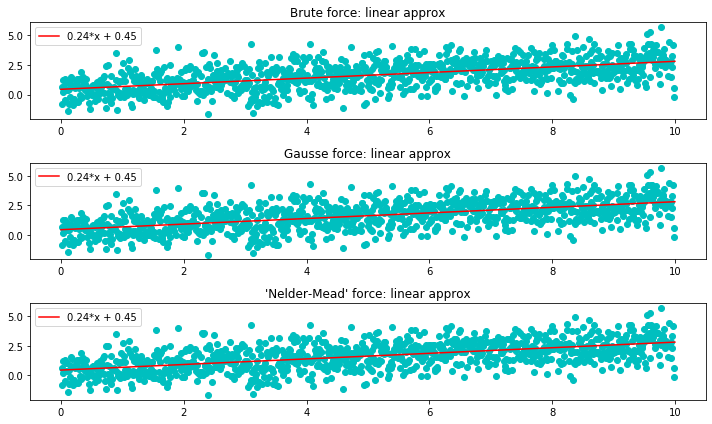

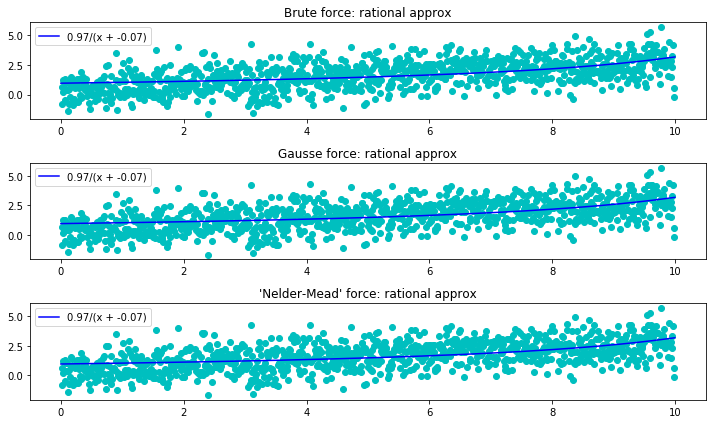

In [291]:
plt.figure(figsize = (10, 6))
plt.subplot(3,1,1)
plot_approx(res_linear_brute, linear, "Brute force: linear approx",
            label ='%.2f*x + %.2f'%tuple(res_linear_brute))
plt.subplot(3,1,2)
plot_approx(res_linear_powell.x, linear, "Gausse force: linear approx",
            label ='%.2f*x + %.2f'%tuple(res_linear_powell.x))
plt.subplot(3,1,3)
plot_approx(res_linear_nm.x, linear, "'Nelder-Mead' force: linear approx", 
            label ='%.2f*x + %.2f'%tuple(res_linear_nm.x))
plt.tight_layout()
plt.show()


plt.figure(figsize = (10, 6))
plt.subplot(3,1,1)
plot_approx(res_rational_brute, rational, "Brute force: rational approx",
            label ='%.2f/(x + %.2f)'%tuple(res_rational_brute), color = 'b')
plt.subplot(3,1,2)
plot_approx(res_rational_powell.x, rational, "Gausse force: rational approx",
            label ='%.2f/(x + %.2f)'%tuple(res_rational_powell.x), color = 'b')
plt.subplot(3,1,3)
plot_approx(res_rational_nm.x, rational, "'Nelder-Mead' force: rational approx", 
            label ='%.2f/(x + %.2f)'%tuple(res_rational_nm.x), color = 'b')
plt.tight_layout()
plt.show()


